In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv(r"D:\machine_learning\data\Mnist data\train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
feature=data.drop("label",axis=1)
target=data["label"]

In [5]:
element=feature.iloc[0]
element=np.reshape(np.array(element),(28,28))
element

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

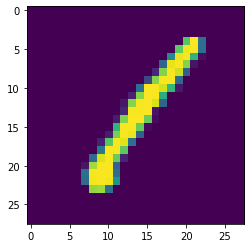

In [6]:
plt.imshow(element)

In [7]:
feature.shape

(42000, 784)

In [8]:
train_x,test_x,train_y,test_y=train_test_split(feature,target,test_size=0.1,random_state=100)

In [9]:
d_tree=dt(max_depth=5)
d_tree.fit(train_x,train_y)
d_tree.score(train_x,train_y),d_tree.score(test_x,test_y)

(0.6822222222222222, 0.6807142857142857)

In [10]:
score=[]
for i in range(2,20):
    d_tree=dt(max_depth=i)
    d_tree.fit(train_x,train_y)
    d_tree.score(test_x,test_y)
    score.append(d_tree.score(test_x,test_y))

Text(0, 0.5, 'Score')

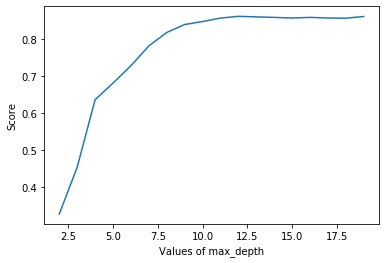

In [11]:
x=range(2,20)
plt.plot(x,score)
plt.xlabel("Values of max_depth")
plt.ylabel("Score")

In [12]:
d_tree=dt(max_depth=9)
d_tree.fit(train_x,train_y)
d_tree.score(train_x,train_y),d_tree.score(test_x,test_y)

(0.8762962962962964, 0.8385714285714285)

#### Model has been trained and now should be tested

In [13]:
test_data=pd.read_csv(r"D:\machine_learning\data\Mnist data\test.csv")

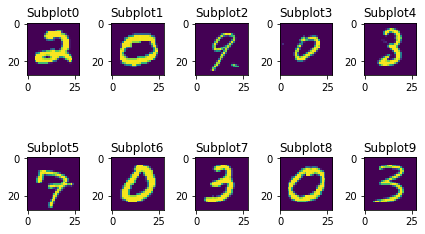

In [14]:
width=5
height=5
rows = 2
cols = 5
axes=[]
fig=plt.figure()

for a in range(rows*cols):
    element=test_data.iloc[a]
    element=np.reshape(np.array(element),(28,28))
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=("Subplot"+str(a))
    axes[-1].set_title(subplot_title)  
    plt.imshow(element)
fig.tight_layout()  
plt.show()


In [15]:
test_predict=d_tree.predict(test_data)
test_predict[:10]

array([2, 0, 9, 9, 3, 9, 0, 3, 0, 3], dtype=int64)